![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [5]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

%matplotlib inline

In [6]:
# Here you run your code to explore the data
dfbom = pd.read_csv('data/zippeddata/bom.movie_gross.csv.gz')
# df.sort_values('year')

#df_imdb_name = pd.read_csv('data/zippeddata/imdb.name.basics.csv')
# df.info()
# df.head()

df_imdb_titleb = pd.read_csv('data/zippeddata/imdb.title.basics.csv.gz')
# df.info()
# df.head()

# df = pd.read_csv('data/zippeddata/bom.movie_gross.csv')
# df.info()
# df.head()

#df_imdb_title = pd.read_csv('data/zippeddata/imdb.title.crew.csv')
# df.info()
# df.head()


#df_imdb_principals = pd.read_csv('data/zippeddata/imdb.title.principals.csv')
# df.info()
# df.head()

df_imdb_ratings = pd.read_csv('data/zippeddata/imdb.title.ratings.csv.gz')
# df.info()
# df.head()

#tsv_file='data/zippeddata/rt.movie_info.tsv'
#csv_table=pd.read_table(tsv_file,sep='\t')
#csv_table.to_csv('rt.movie_info.csv',index=False)

# csv_table.info()
# csv_table.head()


#tsv_file='data/zippeddata/rt.reviews.tsv'
#csv_table=pd.read_table(tsv_file,sep='\t')
#csv_table.to_csv('rt.reviews.csv',index=False)

# csv_table.info()
# csv_table.head()

#df_tmdb_movies = pd.read_csv('data/zippeddata/tmdb.movies.csv')
# df.info()
# df.head()

df_budget = pd.read_csv('data/zippeddata/tn.movie_budgets.csv.gz')





FileNotFoundError: [Errno 2] No such file or directory: 'data/zippeddata/bom.movie_gross.csv.gz'

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [3]:
# Here you run your code to clean the data
# Here you run your code to model the data

# cleaned the first data set
#dfbom['domestic_gross'].dropna(inplace= True)
#dfbom['domestic_gross'] = pd.to_numeric(dfbom['domestic_gross'], errors ='coerce')
#dfbom['foreign_gross'].dropna(inplace= True)
#dfbom['foreign_gross'] = pd.to_numeric(dfbom['foreign_gross'], errors ="coerce")

#dfbom.head()
#dfbom['total_gross']= dfbom['domestic_gross']+ dfbom['foreign_gross']

#dfbom.head()

df_combined_budget = dfbom.merge(df_budget, left_on = "title", right_on = "movie")




df_budget[df_budget.columns[3:6]] = df_budget[df_budget.columns[3:6]].replace('[\$,]', '', regex=True).astype(float)

df_budget.info()

# created another row to determine wether the film grossed a profit
df_budget['profit'] = df_budget['worldwide_gross']- df_budget['production_budget']
df_budget['fin_success'] =  (df_budget['profit'] > 0 )

df_budget.head()
df_budget['fin_success'].value_counts() # 3657 made money, 2125 lost money
df_budget['fin_success'].describe()     

df_imdb_comb = pd.merge(df_imdb_titleb,df_imdb_ratings,on='tconst')

df_budget_genre = df_budget.merge(df_imdb_titleb, left_on='movie', right_on='primary_title') #

df_budget_genre.tail(50)

NameError: name 'dfbom' is not defined

In [4]:
def splitDataFrameList(df,target_column,separator):
    row_accumulator = []
    def splitListToRows(row, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    df.apply(splitListToRows, axis=1, args = (separator, ))
    new_df = pd.DataFrame(row_accumulator)
    return new_df
df_imdb_mtitle = df_imdb_titleb[df_imdb_titleb['genres'].notnull()]

single_genre = splitDataFrameList(df_imdb_mtitle,'genres',',')

budget_genre= df_budget.merge(single_genre, left_on='movie', right_on='primary_title')

# single_genre.groupby('genres')['genres'].value_counts()

budget_genre.groupby('genres')['genres'].count().sort_values(ascending= False) # sorted genres by data



genre_total= dict(budget_genre.groupby('genres')['genres'].count().sort_values(ascending= False))



# budget_genre[budget_genre['fin_success'] == True].groupby('genres').count().sort_values('fin_success', ascending= False)

genre_success_total= dict(budget_genre[budget_genre['fin_success'] == True].groupby('genres')['genres'].count().sort_values(ascending = False))


#delete news and reality tv form data set

del genre_total['News']
del genre_total['Reality-TV']

len(genre_total)



genre_success_total

#delete News from genre_success_total so that both lists match

del genre_success_total['News']
len(genre_total)== len(genre_success_total)

NameError: name 'df_imdb_titleb' is not defined

In [6]:
budget_genre[budget_genre['fin_success'] == True].groupby('genres')['genres'].count().sum()

4760

In [7]:
budget_genre.groupby('genres')['genres'].count().sum()


7796

In [8]:

 
# return the percentages of success of each genre

d1= genre_success_total
d2= genre_total

d3={x:float(d1[x])/d2[x] for x in d2}

d3

{'Drama': 0.5602641717116126,
 'Comedy': 0.665083135391924,
 'Action': 0.6619718309859155,
 'Thriller': 0.5521885521885522,
 'Documentary': 0.5450901803607214,
 'Adventure': 0.7448979591836735,
 'Horror': 0.5783132530120482,
 'Crime': 0.5402010050251256,
 'Romance': 0.6290322580645161,
 'Mystery': 0.6184738955823293,
 'Biography': 0.5806451612903226,
 'Sci-Fi': 0.6331877729257642,
 'Family': 0.6666666666666666,
 'Fantasy': 0.7326732673267327,
 'Animation': 0.8108108108108109,
 'History': 0.5833333333333334,
 'Music': 0.6206896551724138,
 'Sport': 0.52,
 'War': 0.5283018867924528,
 'Musical': 0.6,
 'Western': 0.36}

<AxesSubplot:>

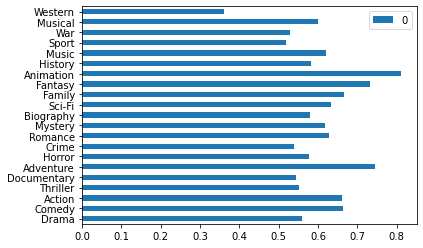

In [9]:
df_percentage = pd.DataFrame.from_dict(d3, orient= 'index')

df_percentage.plot.barh()



In [10]:
#Add release_year column

budget_genre['release_year']=budget_genre['release_date'].map(lambda x:int(x[-4:]))

In [11]:
#Dropped duplicate records of movies

budget_genre.drop_duplicates(subset=['movie','genres'],keep='first',inplace=True)

In [7]:
 def genre_profit():
     
    #We only want to look at films in the last decade so we created a list of recent years only.
    recent_years_list=list(set(budget_genre[budget_genre['release_year']>2010]['release_year']))
    recent_years_exclude_2020s= [a for a in recent_years_list if a<2020]
    recent_years_exclude_2020s.sort()
    
    #Created genre_dict. Dictionary containing Genre names as keys and dictionaries as values. 
    #The inner dictionaries have years as keys and have the average profit in the respective year for films in the given genre.
    #The dataframe only includes medium length movies of a runtime between 90 and 150 minutes.

    def inner_dict(genre):
        get_dict= {}
        for a in recent_years_exclude_2020s:
            get_dict[a]=budget_genre[(budget_genre['genres']==genre) & (budget_genre['release_year']==a) & (budget_genre['runtime_minutes']>=90) & (budget_genre['runtime_minutes']<=150)]['profit'].mean()
        return get_dict

    
    genre_dict={}
    for a in list(set(budget_genre['genres'])):
        genre_dict[a]= inner_dict(a)


    #Visualizing the genre_dict
    
    labels = [a for a in genre_dict['Animation'].keys()]
    animation_val= [a for a in genre_dict['Animation'].values()]
    fantasy_val= [a for a in genre_dict['Fantasy'].values()]
    adventure_val= [a for a in genre_dict['Adventure'].values()]
    action_val= [a for a in genre_dict['Action'].values()]
    comedy_val= [a for a in genre_dict['Comedy'].values()]
    musical_val= [a for a in genre_dict['Musical'].values()]

    x = np.arange(len(labels))
    width = 0.1
    
    y_range = range(0, 800000000, 100000000)
    y_ticks = [a for a in y_range]


    fig, ax = plt.subplots(figsize=(20,6))

    rects1= ax.bar(x - 2.5*width , animation_val, width, label='Animation',edgecolor='black')
    rects2= ax.bar(x - 1.5*width, fantasy_val, width, label='Fantasy', edgecolor='black')
    rects3= ax.bar(x - 0.5*width, adventure_val, width, label='Adventure', edgecolor='black')
    rects4= ax.bar(x + 0.5*width, action_val, width, label='Action', edgecolor='black')
    rects5= ax.bar(x + 1.5*width , comedy_val, width, label='Comedy', edgecolor='black')
    rects6= ax.bar(x + 2.5*width , musical_val, width, label='Musical', edgecolor='black')


    ax.set_ylabel("Profit in 100 million $'s")
    ax.set_xlabel('Year')
    ax.set_title('Average Profit for each genre per year')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_yticks(y_ticks)
    ax.legend(fontsize = "medium")
    

genre_profit()


    

NameError: name 'budget_genre' is not defined

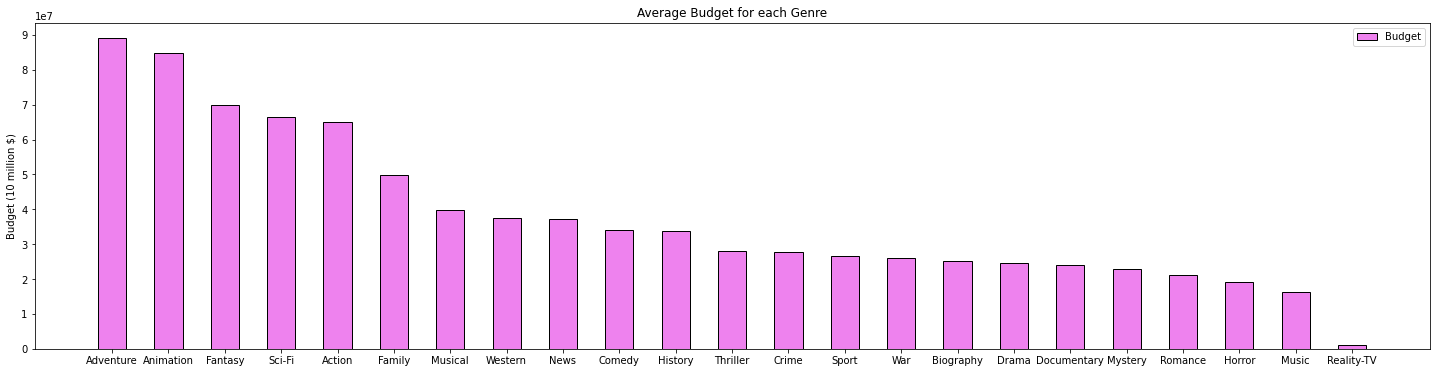

In [16]:
def genre_budget():
    
    #Create a dictionary named genre_budget_dict that has genres as keys and each genre's average budget as values.
    
    genre_budget_dict={}
    for a in list(set(budget_genre['genres'])):
        genre_budget_dict[a]= budget_genre[budget_genre['genres']==a]['production_budget'].mean()

    
    #Created list of tuples with each tuple consisting of a genre and its average genre budget. i.e. ('Action', budget)
    
    sort_genre_budget_dict = sorted(genre_budget_dict.items(),key = lambda x: x[1], reverse = True)


    
    #Creating the visualization
    
    x_values = [a[0] for a in sort_genre_budget_dict]

    y_values = [a[1] for a in sort_genre_budget_dict]

    y_range = range(0, int(max(y_values)+1000000), 10000000)
    y_ticks = [a for a in y_range]


    labels = x_values
    y = y_values

    x = np.arange(len(labels))
    width = 0.5


    fig, ax = plt.subplots(figsize=(25,6))

    rects1= ax.bar(x , y_values, width, label='Budget',edgecolor='black', color='violet')


    ax.set_ylabel('Budget (10 million $)')
    ax.set_title('Average Budget for each Genre')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_yticks(y_ticks)
    ax.legend()
    
genre_budget()



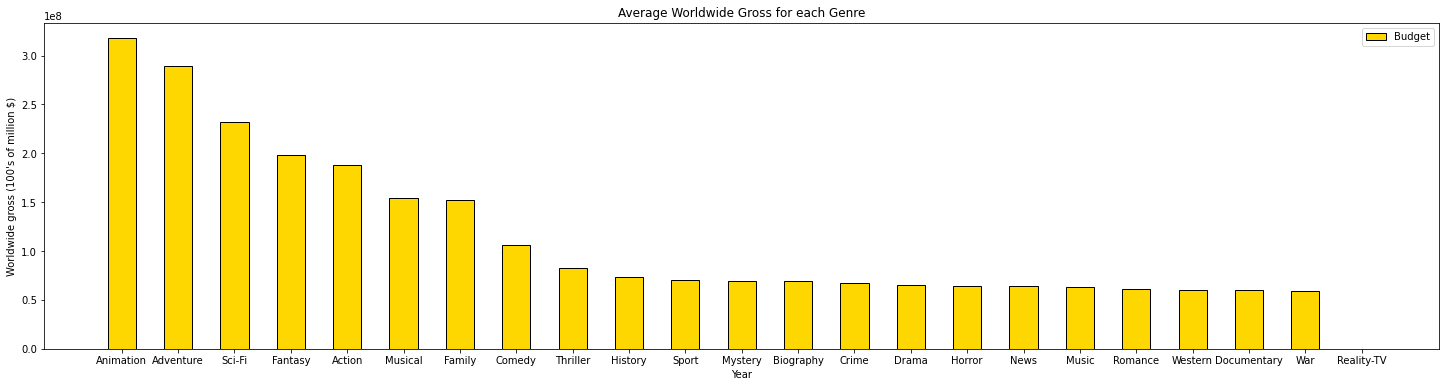

In [58]:
def genre_gross():
    
    #Create a dictionary named genre_budget_dict that has genres as keys and each genre's average gross as values.
    
    genre_gross_dict={}
    for a in list(set(budget_genre['genres'])):
        genre_gross_dict[a]= budget_genre[budget_genre['genres']==a]['worldwide_gross'].mean()

    
    #Created list of tuples with each tuple consisting of a genre and its average genre budget. i.e. ('Action', budget)
    
    sort_genre_gross_dict = sorted(genre_gross_dict.items(),key = lambda x: x[1], reverse = True)


    
    #Creating the visualization
    
    x_values = [a[0] for a in sort_genre_gross_dict]

    y_values = [a[1] for a in sort_genre_gross_dict]

    y_range = range(0, int(max(y_values)+1000000), 50000000)
    y_ticks = [a for a in y_range]


    labels = x_values
    y = y_values

    x = np.arange(len(labels))
    width = 0.5


    fig, ax = plt.subplots(figsize=(25,6))

    rects1= ax.bar(x , y_values, width, label='Budget',edgecolor='black', color='gold')


    ax.set_ylabel("Worldwide gross (100's of million $)")
    ax.set_title('Average Worldwide Gross for each Genre')
    ax.set_xlabel("Year")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_yticks(y_ticks)
    ax.legend()
    
genre_gross()



In [45]:
budget_genre[budget_genre['genres']=='Animation']['worldwide_gross'].mean()

317740154.9558824

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [27]:
# Here you run your code to model the data




## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***